In [ ]:
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import time
from keras.callbacks import EarlyStopping



     |████████████████████████████████| 1.0MB 5.3MB/s 


In [ ]:
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2021-04-06 10:24:32--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘insurance.csv’

insurance.csv           [ <=>                ]  49.09K  --.-KB/s    in 0.05s   

2021-04-06 10:24:32 (997 KB/s) - ‘insurance.csv’ saved [50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']
NUMERIC_COLUMNS = ['age', 'bmi', 'children', 'expenses']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dataset[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('female', 'male'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='smoker', vocabulary_list=('yes', 'no'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='region', vocabulary_list=('southwest', 'southeast', 'northwest', 'northeast'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='bmi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='children', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='expenses', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
sex_dummy = pd.get_dummies(dataset['sex'])
smoker_dummy = pd.get_dummies(dataset['smoker'])
region_dummy = pd.get_dummies(dataset['region'])
dataset = pd.concat([dataset,sex_dummy,smoker_dummy,region_dummy], axis=1)
  
dataset = dataset.drop(['sex','smoker','region'], axis=1)

In [ ]:
dataset['age'].fillna((dataset['age'].mean()), inplace=True)
dataset['bmi'].fillna((dataset['bmi'].mean()), inplace=True)
dataset.head(10)

In [ ]:
new_df = dataset.copy()
labels = dataset.pop('expenses')
print(dataset)

In [ ]:
print(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3)


In [ ]:
print(y_train)

In [ ]:
def my_func(arg):
  arg = tf.convert_to_tensor(arg, dtype=tf.float32)
  return arg


In [ ]:
 #def make_input_fn(new_df, labels, num_epochs=10, shuffle=True, batch_size=32):
  #def input_function():  
   # ds = tf.data.Dataset.from_tensor_slices((dict(dataset), labels))  
    #if shuffle:
    #  ds = ds.shuffle(1000)  
   # ds = ds.batch(batch_size).repeat(num_epochs)  
  #  return ds  
  #return input_function  

#train_input_fn = make_input_fn(x_train, y_train )  
#test_input_fn = make_input_fn(x_test, y_test, num_epochs=1, shuffle=False)

In [ ]:
linear_model = tf.keras.Sequential([
   
   layers.Dense(3),
   layers.Dense(2,kernel_initializer='normal'),
   layers.Dense(units=1,kernel_initializer='normal')])


linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),loss='mean_absolute_error')

history = linear_model.fit(x_train, y_train,epochs=1000,verbose=0,validation_split = 0.2,shuffle=True)


13/13 - 0s - loss: 2958.2446
You passed the challenge. Great job!


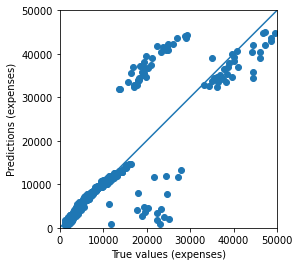

In [ ]:

#loss, mae, mse = linear_model.evaluate(x_test, y_test, verbose=0)
result = linear_model.evaluate(x_test, y_test, verbose=2)


#print("Testing set Mean Abs Error: {:5.2f} expenses".format(mean_absolute_error))

y_pred = linear_model.predict(x_test).flatten()

if mean_absolute_error(y_test,y_pred) < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

test_predictions = linear_model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
